<a href="https://colab.research.google.com/github/sanhiitaa/fastag-fraud-detection-classification/blob/main/fast_tag_fraud_detection_data_preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10101)

# Data Preprocessing (part 1)

Dealing with missing values, cleaning and organizing the dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
df.shape

(5000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
for cols in df.columns:
  print(f'{cols} - {df[cols].nunique()}\n-------------')

Transaction_ID - 5000
-------------
Timestamp - 4423
-------------
Vehicle_Type - 7
-------------
FastagID - 4451
-------------
TollBoothID - 6
-------------
Lane_Type - 2
-------------
Vehicle_Dimensions - 3
-------------
Transaction_Amount - 20
-------------
Amount_paid - 23
-------------
Geographical_Location - 5
-------------
Vehicle_Speed - 85
-------------
Vehicle_Plate_Number - 5000
-------------
Fraud_indicator - 2
-------------


creating a new `state` column

In [7]:
df['state']= df['Vehicle_Plate_Number'].str.slice(0,2)

In [8]:
state_code_map = {
    'KA': 'Karnataka',
    'GA': 'Goa',
    'MH': 'Maharashtra',
    'AP': 'Andhra Pradesh',
    'TN': 'Tamil Nadu',
    'DL': 'Delhi',
    'KL': 'Kerala',
    'GJ': 'Gujarat',
    'TS': 'Telangana',
    'UP': 'Uttar Pradesh',
    'RJ': 'Rajasthan',
    'WB': 'West Bengal',
    'MP': 'Madhya Pradesh',
    'HR': 'Haryana',
    'BR': 'Bihar'
}

df['state'] = df['state'].map(state_code_map)

creating columns `month` and `time-of-day`

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [10]:
df['month'] = df['Timestamp'].dt.month

In [11]:
df['time-of-day']= df['Timestamp'].dt.hour

In [12]:
cols_to_drop= ['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Transaction_Amount', 'Amount_paid', 'Timestamp']
df.drop(columns=cols_to_drop, inplace=True)

In [13]:
df.sample(5)

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Speed,Fraud_indicator,state,month,time-of-day
956,Van,B-102,Express,Medium,"13.042660878688794, 77.47580097259879",48,Not Fraud,Karnataka,10,10
1034,Sedan,A-101,Express,Medium,"12.84197701525119, 77.67547528176169",74,Not Fraud,Goa,8,22
4601,Car,A-101,Regular,Small,"13.21331620748757, 77.55413526894684",85,Not Fraud,Karnataka,8,12
4728,Motorcycle,D-106,Regular,Small,"13.21331620748757, 77.55413526894684",67,Not Fraud,Tamil Nadu,7,6
191,Motorcycle,D-105,Regular,Small,"13.059816123454882, 77.77068662374292",90,Not Fraud,Karnataka,3,11


# Data Preprocessing (part 2)

Encoding, Scaling and Splitting the data

In [14]:
# unique values in each column
for cols in df.columns:
  print(f'{cols} - {df[cols].nunique()} - {df[cols].dtypes}\n-------------')

Vehicle_Type - 7 - object
-------------
TollBoothID - 6 - object
-------------
Lane_Type - 2 - object
-------------
Vehicle_Dimensions - 3 - object
-------------
Geographical_Location - 5 - object
-------------
Vehicle_Speed - 85 - int64
-------------
Fraud_indicator - 2 - object
-------------
state - 15 - object
-------------
month - 12 - int32
-------------
time-of-day - 24 - int32
-------------


In [15]:
cat_cols= [cols for cols in df.columns if df[cols].dtypes==object and cols!='Fraud_indicator']
num_cols= [cols for cols in df.columns if df[cols].dtypes!='object']

In [16]:
cat_cols

['Vehicle_Type',
 'TollBoothID',
 'Lane_Type',
 'Vehicle_Dimensions',
 'Geographical_Location',
 'state']

In [17]:
df= pd.get_dummies(df, columns=cat_cols, drop_first=True)
df = df.applymap( lambda x : int(x) if isinstance(x, bool) else x)

In [18]:
df.head()

,Vehicle_Speed,Fraud_indicator,month,time-of-day,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,...,state_Haryana,state_Karnataka,state_Kerala,state_Madhya Pradesh,state_Maharashtra,state_Rajasthan,state_Tamil Nadu,state_Telangana,state_Uttar Pradesh,state_West Bengal
0,65,Fraud,1,11,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,78,Fraud,1,14,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,53,Not Fraud,1,18,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,92,Fraud,1,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,60,Fraud,1,6,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


Splitting the data

In [19]:
x= df.drop('Fraud_indicator', axis=1)
y= df['Fraud_indicator']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

In [22]:
# scaling x_train and x_test
from sklearn.preprocessing import StandardScaler

for col in num_cols:
  scaler= StandardScaler()
  x_train[col]= scaler.fit_transform(x_train[[col]])
  x_test[col]= scaler.transform(x_test[[col]])

In [24]:
x_train.to_csv('fast_tag_x_train.csv', index=False)
x_test.to_csv('fast_tag_x_test.csv', index=False)

# Convert y_train, y_test to pandas DataFrames
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Save the converted DataFrames to CSV files
y_train_df.to_csv('fast_tag_y_train.csv', index=False)
y_test_df.to_csv('fast_tag_y_test.csv', index=False)

# Exploratory Data Analysis

<Axes: >

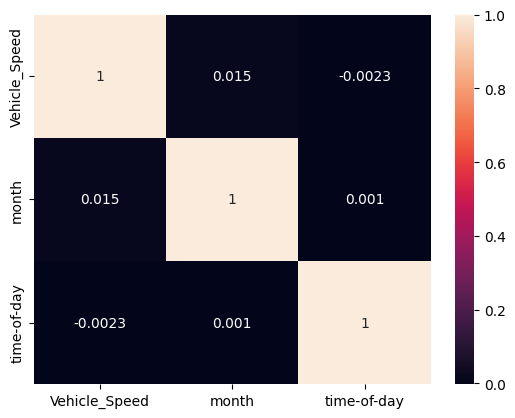

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

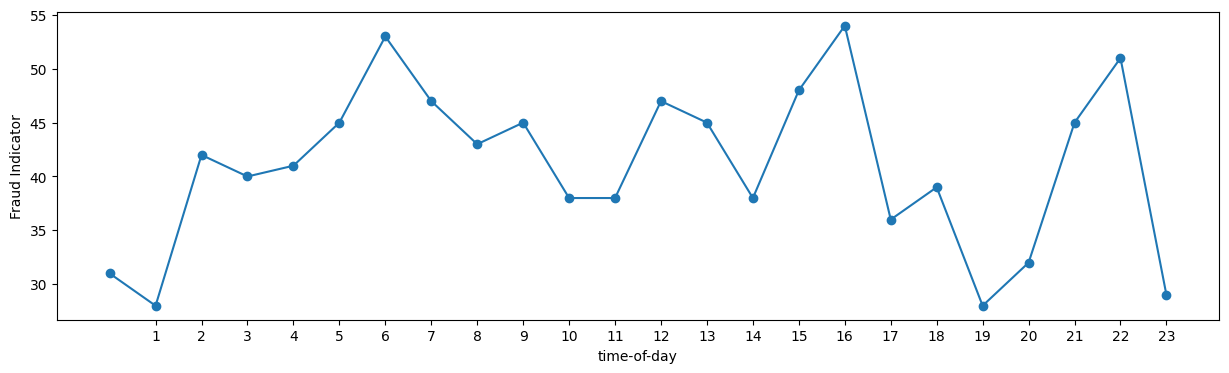

In [ ]:
plt.figure(figsize=(15,4))
pd.crosstab(df['time-of-day'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xlabel('time-of-day')
plt.ylabel('Fraud Indicator')
plt.xticks(ticks=range(1,24));

Maximun frauds happening at `4PM`, `10PM` and `6AM`

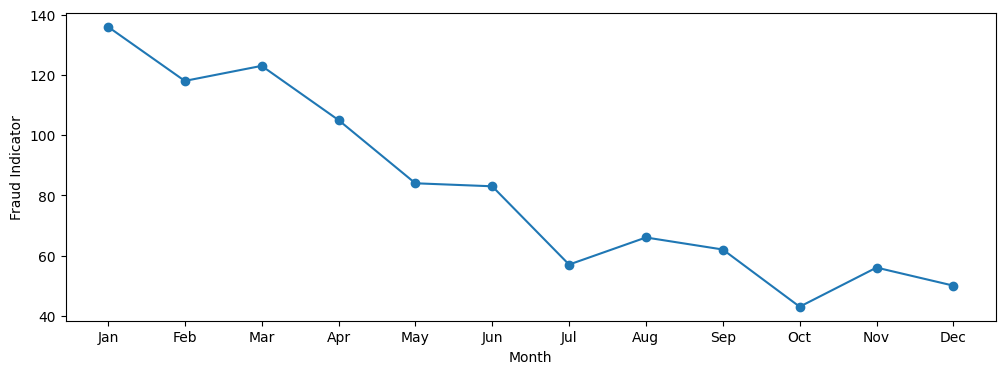

In [ ]:
plt.figure(figsize=(12,4))
pd.crosstab(df['month'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Fraud Indicator')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

Text(0, 0.5, 'Fraud Indicator')

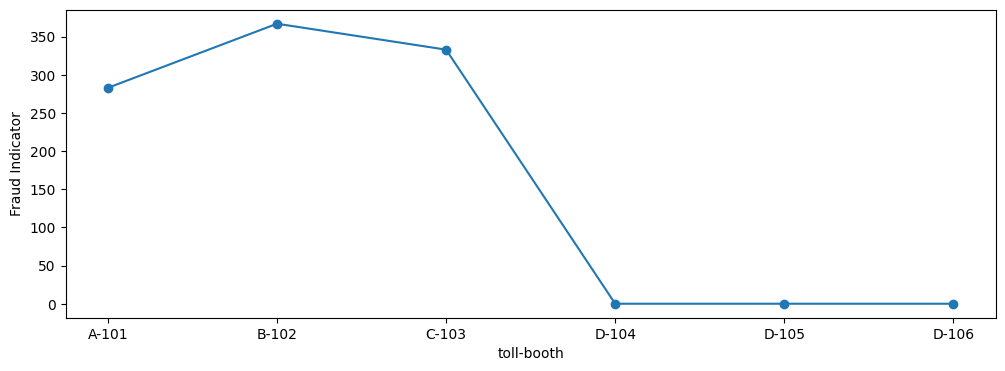

In [ ]:
plt.figure(figsize=(12,4))
pd.crosstab(df['TollBoothID'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xlabel('toll-booth')
plt.ylabel('Fraud Indicator')
# plt.xticks();

Text(0, 0.5, 'Fraud Indicator')

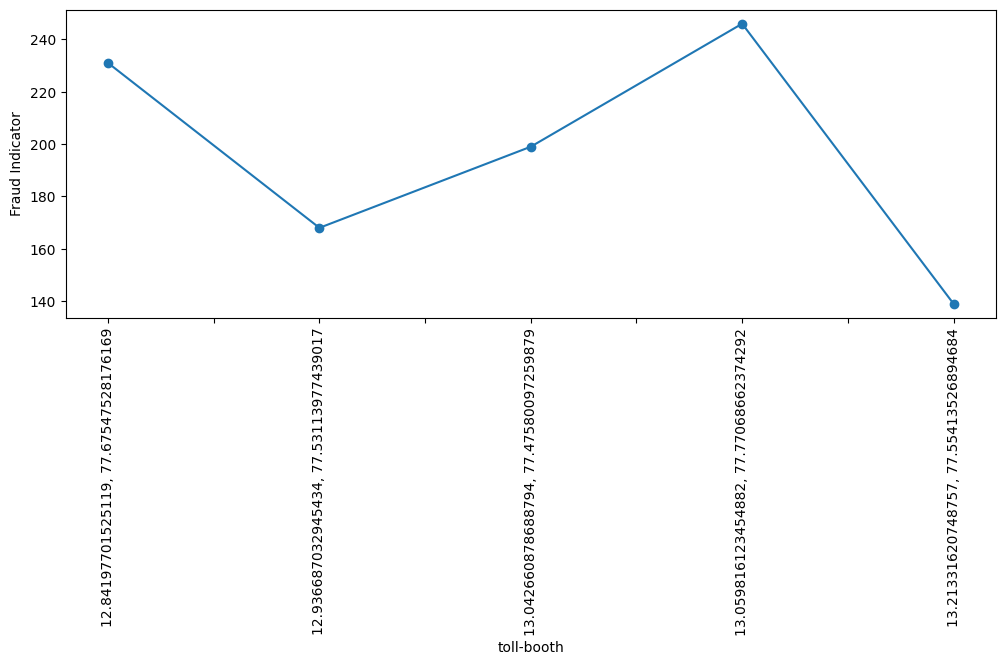

In [ ]:
plt.figure(figsize=(12,4))
pd.crosstab(df['Geographical_Location'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xticks(rotation=90)
plt.xlabel('toll-booth')
plt.ylabel('Fraud Indicator')

Text(0, 0.5, 'Fraud Indicator')

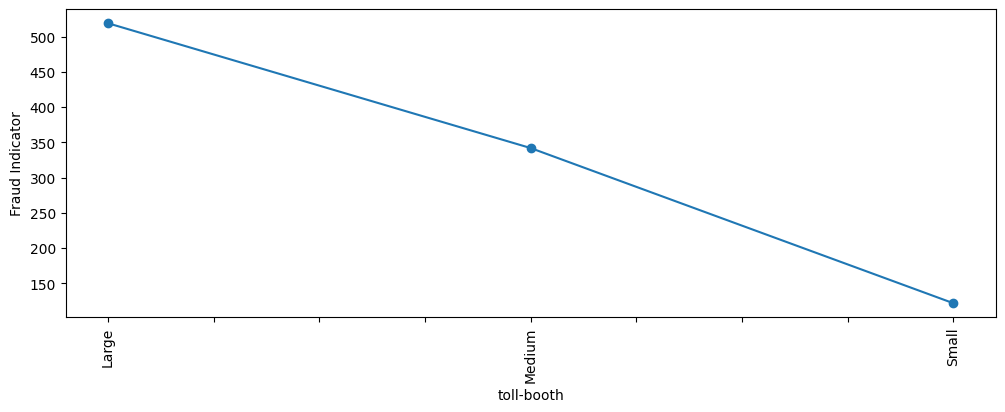

In [ ]:
plt.figure(figsize=(12,4))
pd.crosstab(df['Vehicle_Dimensions'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xticks(rotation=90)
plt.xlabel('toll-booth')
plt.ylabel('Fraud Indicator')

Frauds committed is directly proportional to the vehicle dimension.

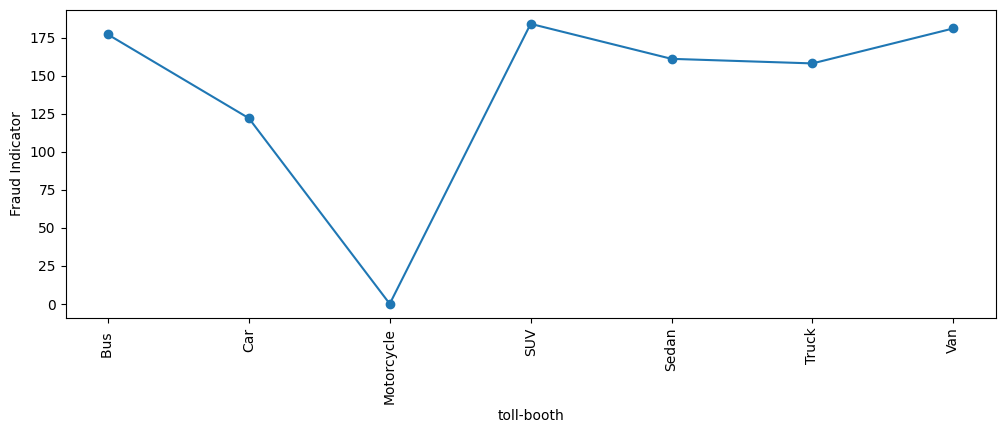

In [ ]:
plt.figure(figsize=(12,4))
pd.crosstab(df['Vehicle_Type'], df['Fraud_indicator']).iloc[:, 0].plot(kind='line', marker='o')
plt.xticks(rotation=90)
plt.xlabel('toll-booth')
plt.ylabel('Fraud Indicator');

Most frauds seems to be commited by `SUV`and `Van`, followed closely by `Sedan` and `Truck`.